<a href="https://colab.research.google.com/github/eunjaelim/JAVA/blob/master/%5BML%5D_01_%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5%ED%8C%8C%EC%9D%BC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 미분이란?
- 곡선의 기울기(slope)
- 함수의 순간 변화율 -> 함수 f(x)에서 x가 미세하게 변할 때 f(x)값이 얼마나 민감하게 반응하는가에 관한 식

<img src= "https://raw.githubusercontent.com/jaygil8755/ML01/master/01.%20%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80/deri.gif" width="400" height="300" align='left'>   

### 편미분이란?
- 다변수 함수에서 각 변수의 변화에 따른 함수의 변화량

<img src= "https://raw.githubusercontent.com/jaygil8755/ML01/master/01.%20%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80/deriv_ex.png" width="400" height="300" align='left'>   

#### 평균제곱오차 편미분

평균제곱 오차
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

기울기 세타1에 대한 편미분  
$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y_i})$

절편 세타0에 대한 편미분  
$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})$

[참고] MSE 편미분 http://taewan.kim/post/cost_function_derivation/

### 단순선형회귀 모델 구현하기 (순수 파이썬)
- (ChatGPT 참고) sklearn을 사용하지 않고, 파이썬으로만 단순선형회귀를 구현하는 코드를 알려주세요.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 생성
# 시드 초기화
np.random.seed(0)
# 0부터 10까지의 100개의 데이터 포인트 생성
X = np.linspace(0,10,100)
y = 2*X+1+np.random.normal(0,1,100)
 # y = 2X + 1의 관계에 노이즈 추가

In [ ]:
X

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
y

array([ 2.76405235,  1.60217741,  2.38277839,  3.84695381,  3.6756388 ,
        1.03282313,  3.16220963,  2.26278421,  2.51294276,  3.22878032,
        3.16424559,  4.67649573,  4.18528015,  3.74793764,  4.27214606,
        4.36397736,  5.72640231,  4.22918517,  4.94943134,  3.9842881 ,
        2.48741422,  5.89604284,  6.30888064,  4.90429963,  8.11823947,
        4.59613938,  6.29828377,  6.2673616 ,  8.18934487,  8.32794463,
        7.21555349,  7.64078878,  6.57686072,  5.6858702 ,  7.52077472,
        8.22705604,  9.50301795,  9.67712732,  8.28944086,  8.57648513,
        8.03225512,  7.86281035,  7.77857829, 11.63764408,  9.37923671,
        9.65283479,  9.04013393, 11.27243985,  9.08307185, 10.68624962,
       10.20554354, 11.6899328 , 10.99424537, 10.52643852, 11.88090868,
       12.53944298, 12.37964854, 12.81762341, 12.08284962, 12.55645075,
       12.44875167, 12.96367916, 12.71210624, 12.00099012, 14.10671907,
       13.7295322 , 12.70313499, 14.99813579, 13.83007537, 14.99

In [ ]:
# 초기값 및 하이퍼파라미터 설정
# 학습률
learning_rate = 0.01
# 경사 하강법 반복 횟수
epochs = 1000
# 데이터 포인트 수
n = len(X)

In [ ]:
# 초기 회귀 계수 설정
# 초기 기울기
slope = 0

# 초기 절편
intercept = 0

In [ ]:
# 경사하강법 수행
for i in range(epochs):
  y_pred = slope * X + intercept # 예측값
  error = y_pred - y # 오차 계산

  # 기울기와 절편의 편미분
  gradient_slope = (2/n)*np.sum(error*X)
  gradient_intercept = (2/n)*np.sum(error)

  # 기울기와 절편 업데이트
  slope -= learning_rate * gradient_slope
  gradient_intercept -= learning_rate * gradient_intercept

  if i % 100 == 0 :
    print(f'epochs={epochs} 기울기={slope:4f} 절편={intercept:.4f} 기울기 편미분 = {gradient_slope:.4f} 절편 편미분 = {gradient_intercept:.4f}')

epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331
epochs=1000 기울기=1.871337 절편=1.8713 기울기 편미분 = -0.0000 절편 편미분 = 0.3331


In [ ]:
# 회귀 계수 출력


In [ ]:
# 테스트 데이터 예측


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.0 MB/s eta 0:00:00


In [ ]:
# 예측 결과 시각화
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.scatter

### [실전 문제] 공부 시간 X와 성적 Y의 데이터가 다음과 같을 때 선형회귀를 구현해보세요.
- 예) 1시간일 때 70점, 2시간일 때 81점, 4시간일 때 93점....   
`data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]`

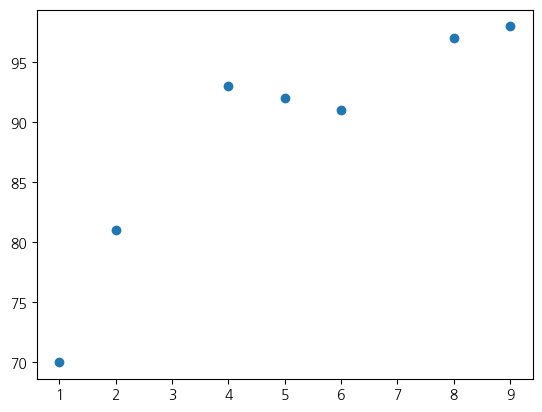

In [ ]:
# 데이터 준비

data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]

X = [i[0]for i in data]
y = [i[1]for i in data]

# 그래프로 나타내기
plt.scatter(X,y)
plt.show()

In [ ]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
X = np.array(X)
y = np.array(y)

In [ ]:
# 초기값 및 하이퍼파라미터 설정
learning_rate = 0.01  # 학습률
epochs = 1000 # 경사 하강법 반복 횟수
n = len(X)  # 데이터 포인트 수
# 초기 회귀 계수 설정
slope = 0  # 초기 기울기
intercept = 0  # 초기 절편

In [ ]:
# 경사하강법 수행
for i in range(epochs):
    y_pred = slope * X + intercept  # 현재 회귀선에 대한 예측값 계산
    error = y_pred - y  # 예측 오차 계산

    # 기울기와 절편의 편미분 계산
    gradient_slope = (2/n) * np.sum(error * X)
    gradient_intercept = (2/n) * np.sum(error)

    # 기울기와 절편 업데이트
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept

    if i % 100 == 0: # 100번 반복될 때마다 현재 상태 출력
        print(f"epochs={i} 기울기={slope:.4f} 절편={intercept:.4f} \
        기울기 편미분={gradient_slope:.4f} 절편 편미분={gradient_intercept:.4f}")

epochs=0 기울기=9.3371 절편=1.7771         기울기 편미분=-933.7143 절편 편미분=-177.7143
epochs=100 기울기=10.0930 절편=28.2265         기울기 편미분=3.1707 절편 편미분=-20.4222
epochs=200 기울기=7.5437 절편=44.6470         기울기 편미분=2.0249 절편 편미분=-13.0421
epochs=300 기울기=5.9156 절편=55.1334         기울기 편미분=1.2931 절편 편미분=-8.3290
epochs=400 기울기=4.8759 절편=61.8302         기울기 편미분=0.8258 절편 편미분=-5.3191
epochs=500 기울기=4.2119 절편=66.1070         기울기 편미분=0.5274 절편 편미분=-3.3969
epochs=600 기울기=3.7878 절편=68.8382         기울기 편미분=0.3368 절편 편미분=-2.1693
epochs=700 기울기=3.5170 절편=70.5825         기울기 편미분=0.2151 절편 편미분=-1.3854
epochs=800 기울기=3.3441 절편=71.6964         기울기 편미분=0.1374 절편 편미분=-0.8847
epochs=900 기울기=3.2336 절편=72.4077         기울기 편미분=0.0877 절편 편미분=-0.5650


In [ ]:
# 테스트 데이터 예측
y_pred = slope * X + intercept


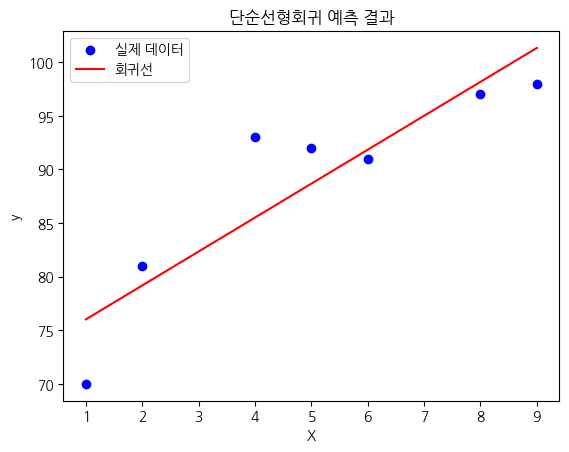

In [ ]:
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()

#### 하이퍼파라미터 변경 하여 성능 높이기
예) epochs = 5000

In [ ]:
epochs = 5000


In [ ]:
# 경사하강법 수행
for i in range(epochs):
    y_pred = slope * X + intercept  # 현재 회귀선에 대한 예측값 계산
    error = y_pred - y  # 예측 오차 계산

    # 기울기와 절편의 편미분 계산
    gradient_slope = (2/n) * np.sum(error * X)
    gradient_intercept = (2/n) * np.sum(error)

    # 기울기와 절편 업데이트
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept

    if i % 100 == 0: # 100번 반복될 때마다 현재 상태 출력
        print(f"epochs={i} 기울기={slope:.4f} 절편={intercept:.4f} \
        기울기 편미분={gradient_slope:.4f} 절편 편미분={gradient_intercept:.4f}")

epochs=0 기울기=3.1631 절편=72.8620         기울기 편미분=0.0560 절편 편미분=-0.3608
epochs=100 기울기=3.1181 절편=73.1521         기울기 편미분=0.0358 절편 편미분=-0.2304
epochs=200 기울기=3.0893 절편=73.3374         기울기 편미분=0.0228 절편 편미분=-0.1472
epochs=300 기울기=3.0709 절편=73.4557         기울기 편미분=0.0146 절편 편미분=-0.0940
epochs=400 기울기=3.0592 절편=73.5313         기울기 편미분=0.0093 절편 편미분=-0.0600
epochs=500 기울기=3.0517 절편=73.5796         기울기 편미분=0.0060 절편 편미분=-0.0383
epochs=600 기울기=3.0469 절편=73.6104         기울기 편미분=0.0038 절편 편미분=-0.0245
epochs=700 기울기=3.0439 절편=73.6301         기울기 편미분=0.0024 절편 편미분=-0.0156
epochs=800 기울기=3.0419 절편=73.6426         기울기 편미분=0.0015 절편 편미분=-0.0100
epochs=900 기울기=3.0407 절편=73.6507         기울기 편미분=0.0010 절편 편미분=-0.0064
epochs=1000 기울기=3.0399 절편=73.6558         기울기 편미분=0.0006 절편 편미분=-0.0041
epochs=1100 기울기=3.0394 절편=73.6591         기울기 편미분=0.0004 절편 편미분=-0.0026
epochs=1200 기울기=3.0390 절편=73.6611         기울기 편미분=0.0003 절편 편미분=-0.0017
epochs=1300 기울기=3.0388 절편=73.6625         기울기 편미분=0.0002 절편 편미분=-0.0011
epoc

In [ ]:
# 테스트 데이터 예측
y_pred = slope * X + intercept

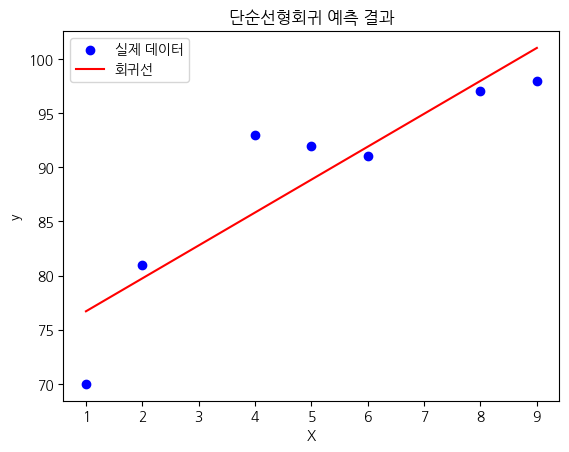

In [ ]:
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()

### sklearn 라이브러리로 단순 선형회귀 구현하기
- linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]

X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X,y)

ValueError: ignored

In [ ]:
# 데이터 reshape
X_data = X.reshape(-1,1)
y_data = y.reshape(-1,1)
print(X_data)

[[1]
 [2]
 [4]
 [5]
 [6]
 [8]
 [9]]


In [ ]:
# Create linear regression object
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X_data,y_data)

LinearRegression()

In [ ]:
# 3시간 공부했을 때 점수는?
reg.predict([[3]])

array([[82.78021978]])

In [ ]:
#회귀계수
reg.coef_

array([[3.03846154]])

In [ ]:
# 절편
reg.intercept_

array([73.66483516])

In [44]:
# 예측 식
y_pred = reg.coef_*X + reg.intercept_
y_pred = y_pred.reshape(7,1)

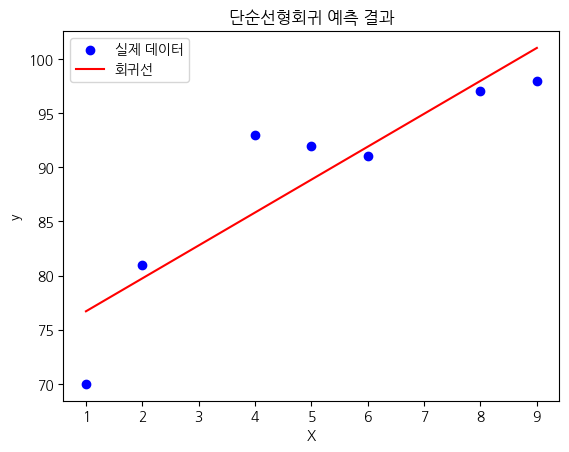

In [45]:
# 시각화
plt.scatter(X_data, y_data, color='blue', label='실제 데이터')
plt.plot(X_data, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()